# S04 T02 Visualizacón gráfica de movies.dat

## Exercici 2


In [463]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset movies.csv

In [464]:
# Open the choosen file
movies = pd.read_csv('https://raw.githubusercontent.com/IT-Academy-BCN/Data-Science/main/Pre-processing-data/movies.dat', 
                     sep= '::', encoding='latin-1', header = None)

In [465]:
movies.head()

,0,1,2
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [466]:
# asigno nombre a las columnas
movies.columns = ['id', 'film', 'type']

In [467]:
movies.head()

,id,film,type
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [468]:
movies.shape

(3883, 3)

In [469]:
# necesito aislar los tipos de película para poder trabajar sobre los datos
tipos = movies["type"].str.split('|', expand=True)
tipos['id'] = movies['id']
tipos

,0,1,2,3,4,5,id
0,Animation,Children's,Comedy,None,None,None,1
1,Adventure,Children's,Fantasy,None,None,None,2
2,Comedy,Romance,None,None,None,None,3
3,Comedy,Drama,None,None,None,None,4
4,Comedy,None,None,None,None,None,5
...,...,...,...,...,...,...,...
3878,Comedy,None,None,None,None,None,3948
3879,Drama,None,None,None,None,None,3949
3880,Drama,None,None,None,None,None,3950
3881,Drama,None,None,None,None,None,3951


In [470]:
# vuelvo a unir las películas con sus tipos
movies = movies.drop(['type'], axis=1)
movies

,id,film
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)
...,...,...
3878,3948,Meet the Parents (2000)
3879,3949,Requiem for a Dream (2000)
3880,3950,Tigerland (2000)
3881,3951,Two Family House (2000)


In [471]:
df0 = movies.copy()
df1 = movies.copy()
df2 = movies.copy()
df3 = movies.copy()
df4 = movies.copy()
df5 = movies.copy()
df0['type'] = tipos[0]
df1['type'] = tipos[1]
df2['type'] = tipos[2]
df3['type'] = tipos[3]
df4['type'] = tipos[4]
df5['type'] = tipos[5]
frames = [df0, df1, df2, df3, df4, df5]
df = pd.concat(frames).sort_values('id').copy()
df

,id,film,type
0,1,Toy Story (1995),Animation
0,1,Toy Story (1995),None
0,1,Toy Story (1995),Comedy
0,1,Toy Story (1995),None
0,1,Toy Story (1995),None
...,...,...,...
3882,3952,"Contender, The (2000)",None
3882,3952,"Contender, The (2000)",Thriller
3882,3952,"Contender, The (2000)",Drama
3882,3952,"Contender, The (2000)",None


In [472]:
valores_nulos = df.shape[0] - df.count()
print('Cantidad de líneas: ',df.shape[0])
print('Valores nulos: ', valores_nulos)

Cantidad de líneas:  23298
Valores nulos:  id          0
film        0
type    16890
dtype: int64


In [473]:
# elimino las filas en donde type es nulo
df = df.dropna()
df

,id,film,type
0,1,Toy Story (1995),Animation
0,1,Toy Story (1995),Comedy
0,1,Toy Story (1995),Children's
1,2,Jumanji (1995),Children's
1,2,Jumanji (1995),Adventure
...,...,...,...
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama
3882,3952,"Contender, The (2000)",Thriller


In [474]:
df =df.reset_index().drop(['index'], axis=1)
df


,id,film,type
0,1,Toy Story (1995),Animation
1,1,Toy Story (1995),Comedy
2,1,Toy Story (1995),Children's
3,2,Jumanji (1995),Children's
4,2,Jumanji (1995),Adventure
...,...,...,...
6403,3949,Requiem for a Dream (2000),Drama
6404,3950,Tigerland (2000),Drama
6405,3951,Two Family House (2000),Drama
6406,3952,"Contender, The (2000)",Thriller


In [475]:
valores_nulos = df.shape[0] - df.count()
print(valores_nulos)

id      0
film    0
type    0
dtype: int64


In [476]:
generos = df.type.unique()
generos

array(['Animation', 'Comedy', "Children's", 'Adventure', 'Fantasy',
       'Romance', 'Drama', 'Action', 'Thriller', 'Crime', 'Horror',
       'Sci-Fi', 'Documentary', 'War', 'Musical', 'Mystery', 'Film-Noir',
       'Western'], dtype=object)

In [477]:
df.type.nunique()

18

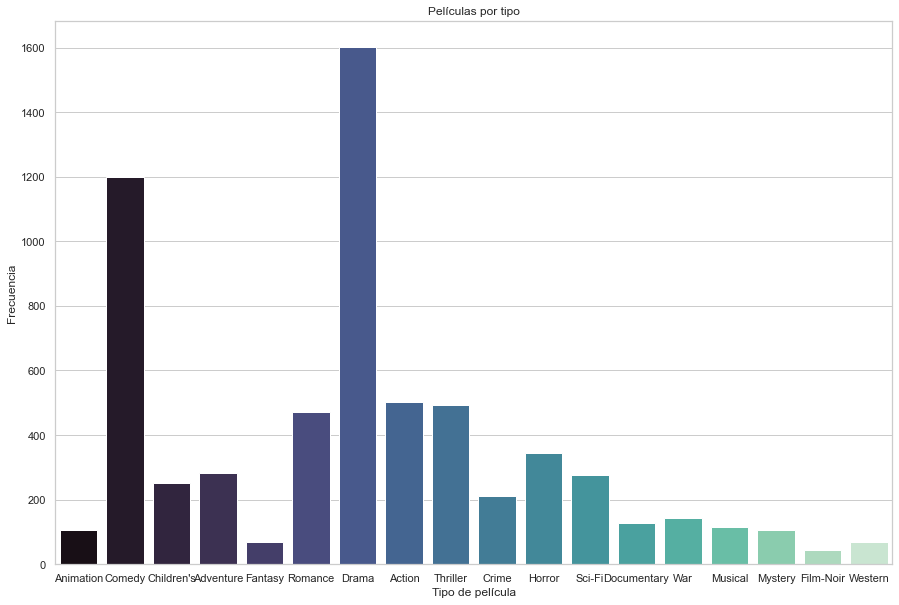

In [478]:
# Create data
x = df.type
colors = 'Blue'
plt.figure(figsize=(15,10))


# Plot
sns.countplot(x,  palette='mako')

plt.title('Películas por tipo')
plt.ylabel('Frecuencia')
plt.xlabel('Tipo de película')
plt.show()

In [479]:
# copiando la función del S04 T01 para representar una variable categórica
# define a function to plot a categorial variable
def plot_cat(vble):
    # take out the name of the column
    col_name = pd.DataFrame(vble).keys()[0]
    
    # calculate the values to display (counts)
    counts = vble.value_counts()
    # use a pie plot
    counts_bar = counts.plot(kind='pie', y=vble, figsize =(9, 9))
    
    # set titles
    counts_bar.set_title("Apariciones de {} en el Dataset".format(col_name), fontsize=16, weight="bold")
    counts_bar.set_xlabel("Cantidad de apariciones", fontsize=14, weight = "bold")
    counts_bar.set_ylabel("Valores de " + col_name,  fontsize=14, weight="bold")
    plt.show()
    
    # use a horizontal bar plot
    counts_bar = counts.plot(kind='barh', y=vble)
    plt.show()
    return



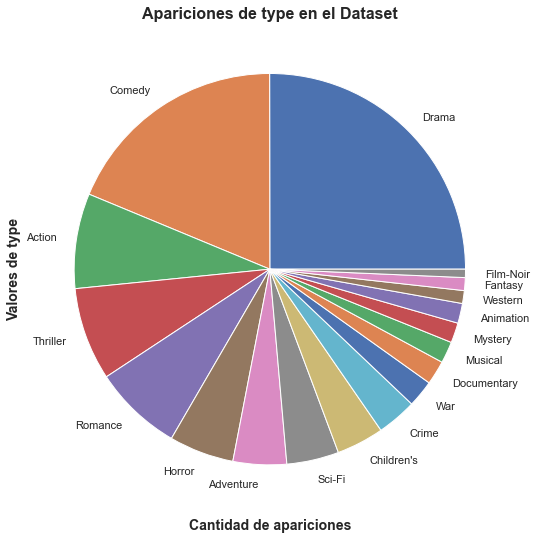

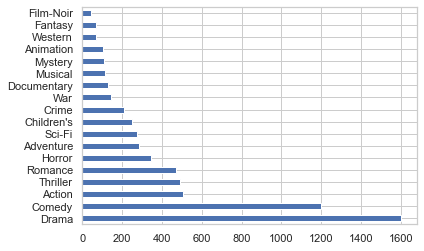

In [480]:
plot_cat(df.type)

In [481]:
# muestro 2 decimales
pd.options.display.float_format = '{:.2f}'.format
counts = df.type.value_counts()
counts = pd.DataFrame(counts)
counts.shape
# counts.columns = ['genero','cant']


(18, 1)

In [482]:
total = df.shape[0]
print('Total de géneros analizados: ',total)

counts['pct']=  round((counts['type'] / (total - counts['type']))*100, 2)
counts = counts.reset_index()
counts.columns = ['genero', 'cant', 'pct']
counts

Total de géneros analizados:  6408


,genero,cant,pct
0,Drama,1603,33.36
1,Comedy,1200,23.04
2,Action,503,8.52
3,Thriller,492,8.32
4,Romance,471,7.93
5,Horror,343,5.66
6,Adventure,283,4.62
7,Sci-Fi,276,4.50
8,Children's,251,4.08
9,Crime,211,3.40


### el 33% de los géneros que se analizaron dieron que eran Drama

## Exercici 3

In [483]:
movies

,id,film
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)
...,...,...
3878,3948,Meet the Parents (2000)
3879,3949,Requiem for a Dream (2000)
3880,3950,Tigerland (2000)
3881,3951,Two Family House (2000)


In [484]:
tipos

,0,1,2,3,4,5,id
0,Animation,Children's,Comedy,None,None,None,1
1,Adventure,Children's,Fantasy,None,None,None,2
2,Comedy,Romance,None,None,None,None,3
3,Comedy,Drama,None,None,None,None,4
4,Comedy,None,None,None,None,None,5
...,...,...,...,...,...,...,...
3878,Comedy,None,None,None,None,None,3948
3879,Drama,None,None,None,None,None,3949
3880,Drama,None,None,None,None,None,3950
3881,Drama,None,None,None,None,None,3951


In [485]:
result = pd.concat([movies, tipos], axis=1)
result

,id,film,0,1,2,3,4,5,id
0,1,Toy Story (1995),Animation,Children's,Comedy,None,None,None,1
1,2,Jumanji (1995),Adventure,Children's,Fantasy,None,None,None,2
2,3,Grumpier Old Men (1995),Comedy,Romance,None,None,None,None,3
3,4,Waiting to Exhale (1995),Comedy,Drama,None,None,None,None,4
4,5,Father of the Bride Part II (1995),Comedy,None,None,None,None,None,5
...,...,...,...,...,...,...,...,...,...
3878,3948,Meet the Parents (2000),Comedy,None,None,None,None,None,3948
3879,3949,Requiem for a Dream (2000),Drama,None,None,None,None,None,3949
3880,3950,Tigerland (2000),Drama,None,None,None,None,None,3950
3881,3951,Two Family House (2000),Drama,None,None,None,None,None,3951


In [486]:
result = result.drop(['id'], axis =1)
result.columns = ['film','gen1','gen2','gen3','gen4','gen5','gen6']
result

,film,gen1,gen2,gen3,gen4,gen5,gen6
0,Toy Story (1995),Animation,Children's,Comedy,None,None,None
1,Jumanji (1995),Adventure,Children's,Fantasy,None,None,None
2,Grumpier Old Men (1995),Comedy,Romance,None,None,None,None
3,Waiting to Exhale (1995),Comedy,Drama,None,None,None,None
4,Father of the Bride Part II (1995),Comedy,None,None,None,None,None
...,...,...,...,...,...,...,...
3878,Meet the Parents (2000),Comedy,None,None,None,None,None
3879,Requiem for a Dream (2000),Drama,None,None,None,None,None
3880,Tigerland (2000),Drama,None,None,None,None,None
3881,Two Family House (2000),Drama,None,None,None,None,None


In [487]:
# defino funciones para calcular las películas que comparten dos géneros

# dado el df devuelve todas las películas con un género determinado
def pel_gen(df, genero):
    filtro1 = df['gen1'] == genero
    filtro2 = df['gen2'] == genero
    filtro3 = df['gen3'] == genero
    filtro4 = df['gen4'] == genero
    filtro5 = df['gen5'] == genero
    filtro6 = df['gen6'] == genero
    filtro = filtro1 | filtro2 | filtro3 | filtro4 | filtro5 | filtro6
    return df.loc[filtro]

# calcula las películas que comparten dos géneros 
def calcula(df,gen1,gen2):
    df1 = pel_gen(df,gen1)
    df2 = pel_gen(df,gen2)
    ambos = pd.merge(df1, df2, how='inner', on='film')
    return ambos.shape[0]

In [488]:
# veo un ejemplo para ver lo que estoy calculando
pel_Drama = pel_gen(result,'Drama')
pel_Thriller = pel_gen(result,'Thriller')

ambos = pd.merge(pel_Drama, pel_Thriller, how='inner', on='film')
ambos

,film,gen1_x,gen2_x,gen3_x,gen4_x,gen5_x,gen6_x,gen1_y,gen2_y,gen3_y,gen4_y,gen5_y,gen6_y
0,Casino (1995),Drama,Thriller,None,None,None,None,Drama,Thriller,None,None,None,None
1,Copycat (1995),Crime,Drama,Thriller,None,None,None,Crime,Drama,Thriller,None,None,None
2,Guardian Angel (1994),Action,Drama,Thriller,None,None,None,Action,Drama,Thriller,None,None,None
3,Eye for an Eye (1996),Drama,Thriller,None,None,None,None,Drama,Thriller,None,None,None,None
4,"Juror, The (1996)",Drama,Thriller,None,None,None,None,Drama,Thriller,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,White Sands (1992),Drama,Thriller,None,None,None,None,Drama,Thriller,None,None,None,None
106,Silent Fall (1994),Drama,Thriller,None,None,None,None,Drama,Thriller,None,None,None,None
107,"Phantom of the Opera, The (1943)",Drama,Thriller,None,None,None,None,Drama,Thriller,None,None,None,None
108,Get Carter (2000),Action,Drama,Thriller,None,None,None,Action,Drama,Thriller,None,None,None


In [489]:
# genero un dataframe en donde tenga la cantidad de películas que comparten los géneros de la fila y la columna

l = generos.shape[0]

dfgeneros = pd.DataFrame(columns = generos)

for gen1 in generos:
    lista = []
    for gen2 in generos:
        # calculo la cantidad de películas que comparten ambos géneros
        lista = lista + [pd.to_numeric(calcula(result,gen1,gen2))+1]
    dfgeneros.loc[gen1] = lista

# tengo que convertir los datos a numéricos porque dtypes daba objetos
for gen1 in generos:
    dfgeneros[gen1] = pd.to_numeric(dfgeneros[gen1])
    



<AxesSubplot:>

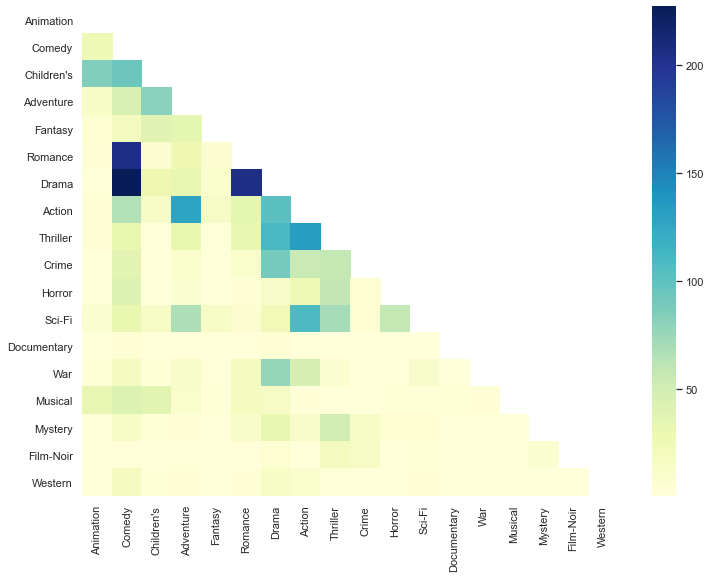

In [490]:
mascara = np.triu(dfgeneros)
plt.figure(figsize=(12, 9))
sns.heatmap(dfgeneros, mask = mascara, cmap="YlGnBu" )

## Vemos que la combinación que más aparece es Drama con Comedy, seguidas por Drama / Romance y Comedy / Romance